In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
emails_df = pd.read_csv('data/cleaned_emails.csv', usecols=['email_text'])
emails_df

,email_text
0,Here is our forecast
1,"Jeff,\n\nIn light of the puny VAR allotments a..."
2,Greg here are my questions regarding the cedar...
3,Is AMF willing to put up the additional earnes...
4,please send me their resumes
...,...
33528,Sundance 3:\tAug. 16 to Sept. 13\nSundance 4:\...
33529,The canadian sap # is \tp00565421\nthe us sap ...
33530,yes
33531,One of us will attend


In [3]:
emails = emails_df['email_text']
emails[:5]

0                                 Here is our forecast
1    Jeff,\n\nIn light of the puny VAR allotments a...
2    Greg here are my questions regarding the cedar...
3    Is AMF willing to put up the additional earnes...
4                         please send me their resumes
Name: email_text, dtype: object

In [4]:
import nltk

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

tf_idf_vec = TfidfVectorizer(stop_words='english', max_features=10000)
tf_idf_raw = tf_idf_vec.fit_transform(emails)
tf_idf_normalized = normalize(tf_idf_raw)
tf_idf = tf_idf_normalized.toarray()

In [12]:
pd.DataFrame(tf_idf, columns=tf_idf_vec.get_feature_names()).columns

Index(['00', '000', '0029', '005', '008', '00am', '00p', '00pm', '01', '0102',
       ...
       'zhiyun', 'zimin', 'zip', 'zipper', 'zivic', 'zone', 'zonecode',
       'zones', 'zoo', 'zufferli'],
      dtype='object', length=10000)

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # fit to 2 dim
tf_idf_2dim = pca.fit_transform(tf_idf) # apply fit

In [36]:
from sklearn.cluster import KMeans

### Elbow Method

In [31]:
kmeans_list = [KMeans(n_clusters=n, max_iter=1000, algorithm='auto') for n in range(1,10)]
kmeans_list

[KMeans(max_iter=1000, n_clusters=1),
 KMeans(max_iter=1000, n_clusters=2),
 KMeans(max_iter=1000, n_clusters=3),
 KMeans(max_iter=1000, n_clusters=4),
 KMeans(max_iter=1000, n_clusters=5),
 KMeans(max_iter=1000, n_clusters=6),
 KMeans(max_iter=1000, n_clusters=7),
 KMeans(max_iter=1000),
 KMeans(max_iter=1000, n_clusters=9)]

In [33]:
scores = [kmeans.fit(tf_idf_2dim).score(tf_idf_2dim) for kmeans in kmeans_list]
scores

[-1089.7298687020857,
 -528.8889829426258,
 -255.36594470565072,
 -129.55409903968737,
 -91.25271605663751,
 -63.454356834053634,
 -44.74459220976924,
 -34.035255794707105,
 -25.54674871595241]

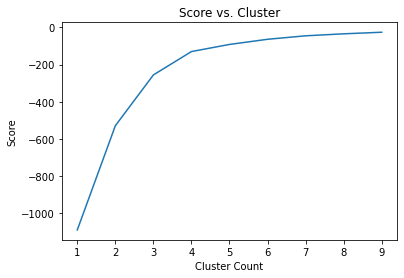

In [35]:
plt.plot(range(1,10), scores)
plt.xlabel('Cluster Count')
plt.ylabel('Score')
plt.title("Score vs. Cluster")
plt.show()

In [41]:
kmeans = KMeans(n_clusters=4, max_iter=1000, algorithm='auto')
fit_result = kmeans.fit(tf_idf_2dim)

preds = kmeans.predict(tf_idf_2dim)

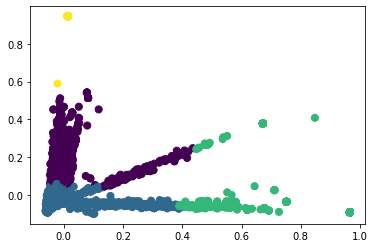

In [42]:
plt.scatter(tf_idf_2dim[:, 0], tf_idf_2dim[:, 1], c=preds, s=50, cmap='viridis')